In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
print("Libraries imported successfully!")

Libraries imported successfully!


In [ ]:
df = pd.read_csv('/content/project dataset.csv')
print("Dataset loaded successfully!")

Dataset loaded successfully!


In [ ]:
# Display dataset shape
print(f"\nDataset contains {df.shape[0]} rows and {df.shape[1]} columns.")
# Display dataset info
df.info()
# Check for missing values
print("\nMissing Values in Each Column:\n", df.isnull().sum())


Dataset contains 28242 rows and 7 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Crop                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   yield_hg/ha                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  int64  
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 1.5+ MB

Missing Values in Each Column:
 Area                             0
Crop                             0
Year                             0
yield_hg/ha                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg

In [ ]:
# Summary statistics for numerical columns
num_summary = df.describe().T # Transpose for readability
num_summary["median"] = df.select_dtypes(include=['number']).median() # Compute median only for numerical columns
print("\nSummary Statistics for Numerical Columns:\n", num_summary)
# Summary statistics for categorical columns
cat_summary = df.describe(include=['O']).T # Include only categorical (object type) columns
print("\nSummary Statistics for Categorical Columns:\n", cat_summary)


Summary Statistics for Numerical Columns:
                                  count          mean           std      min  \
Year                           28242.0   2001.544296      7.051905  1990.00   
yield_hg/ha                    28242.0  77053.332094  84956.612897    50.00   
average_rain_fall_mm_per_year  28242.0   1149.055980    709.812150    51.00   
pesticides_tonnes              28242.0  37076.909344  59958.784665     0.04   
avg_temp                       28242.0     20.542627      6.312051     1.30   

                                      25%       50%        75%        max  \
Year                            1995.0000   2001.00    2008.00    2013.00   
yield_hg/ha                    19919.2500  38295.00  104676.75  501412.00   
average_rain_fall_mm_per_year    593.0000   1083.00    1668.00    3240.00   
pesticides_tonnes               1702.0000  17529.44   48687.88  367778.00   
avg_temp                          16.7025     21.51      26.00      30.65   

                  

In [ ]:
# Summary statistics for categorical columns
cat_summary = df.describe(include=['O']).T # Include only categorical (object type) columns
print("\nSummary Statistics for Categorical Columns:\n", cat_summary)


Summary Statistics for Categorical Columns:
       count unique       top  freq
Area  28242    101     India  4048
Crop  28242     10  Potatoes  4276


In [ ]:
# Check unique values in categorical columns
cat_cols = df.select_dtypes(include=['O']).columns
for col in cat_cols:
  print(f"\nUnique values in '{col}': {df[col].nunique()}")
  print(df[col].value_counts().head(10)) # Show top 10 most frequent values


Unique values in 'Area': 101
Area
India           4048
Brazil          2277
Mexico          1472
Pakistan        1449
Australia        966
Japan            966
Indonesia        828
South Africa     644
Turkey           625
Ecuador          621
Name: count, dtype: int64

Unique values in 'Crop': 10
Crop
Potatoes                4276
Maize                   4121
Wheat                   3857
Rice, paddy             3388
Soybeans                3223
Sorghum                 3039
Sweet potatoes          2890
Cassava                 2045
Yams                     847
Plantains and others     556
Name: count, dtype: int64


In [ ]:
# Detect outliers using IQR
for col in df.select_dtypes(include=['int64', 'float64']).columns:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
  print(f"\nOutliers detected in '{col}': {len(outliers)}")


Outliers detected in 'Year': 0

Outliers detected in 'yield_hg/ha': 2059

Outliers detected in 'average_rain_fall_mm_per_year': 0

Outliers detected in 'pesticides_tonnes': 1418

Outliers detected in 'avg_temp': 34


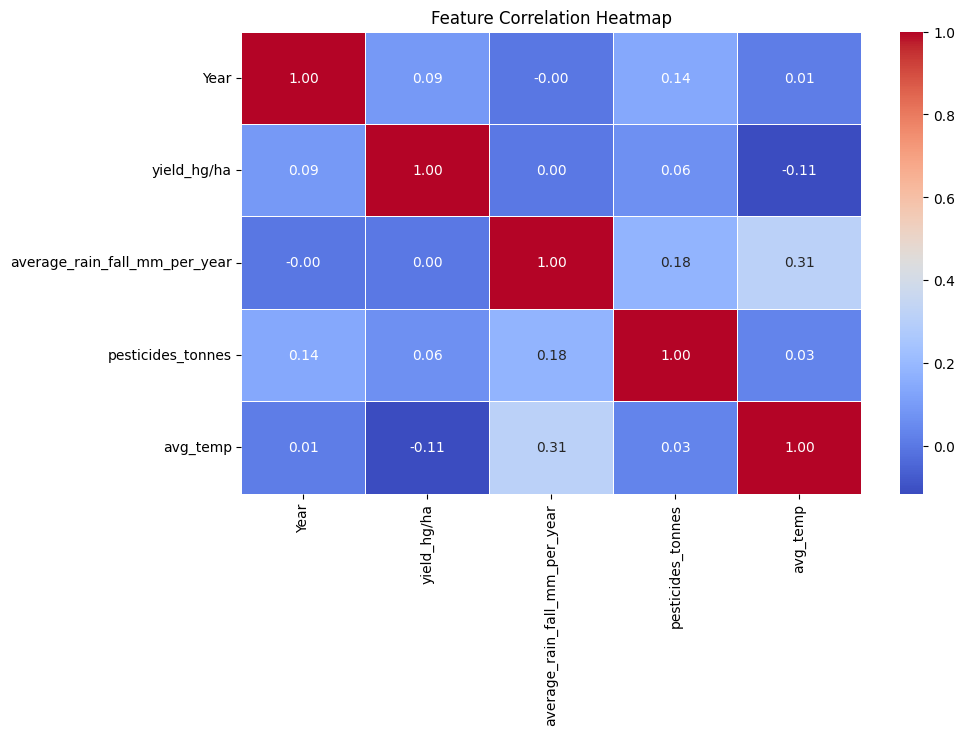

In [ ]:
# Select only numerical columns
df_numeric = df.select_dtypes(include=['number'])
# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
# Count of unique values in categorical columns
print("Unique Areas Count:", df['Area'].nunique())
print("Unique Crops Count:", df['Crop'].nunique())
# Show top 10 most common Areas and Crops
print("\nTop 10 Areas with Highest Data Points:\n", df['Area'].value_counts().head(10))
print("\nTop 10 Crops with Highest Data Points:\n", df['Crop'].value_counts().head(10))
# Unique Years distribution
print("\nAvailable Years:", sorted(df['Year'].unique()))

Unique Areas Count: 101
Unique Crops Count: 10

Top 10 Areas with Highest Data Points:
 Area
India           4048
Brazil          2277
Mexico          1472
Pakistan        1449
Australia        966
Japan            966
Indonesia        828
South Africa     644
Turkey           625
Ecuador          621
Name: count, dtype: int64

Top 10 Crops with Highest Data Points:
 Crop
Potatoes                4276
Maize                   4121
Wheat                   3857
Rice, paddy             3388
Soybeans                3223
Sorghum                 3039
Sweet potatoes          2890
Cassava                 2045
Yams                     847
Plantains and others     556
Name: count, dtype: int64

Available Years: [np.int64(1990), np.int64(1991), np.int64(1992), np.int64(1993), np.int64(1994), np.int64(1995), np.int64(1996), np.int64(1997), np.int64(1998), np.int64(1999), np.int64(2000), np.int64(2001), np.int64(2002), np.int64(2004), np.int64(2005), np.int64(2006), np.int64(2007), np.int64(2008), np

In [ ]:
# Descriptive statistics for yield
yield_stats = df['yield_hg/ha'].agg(["max", "min", "mean", "median"])
print("\nYield Statistics:\n", yield_stats)
# Find all areas and years where max/min yield occurred
max_yield_data = df[df['yield_hg/ha'] == yield_stats["max"]][['Area', 'Year']]
min_yield_data = df[df['yield_hg/ha'] == yield_stats["min"]][['Area', 'Year']]
print("\nAreas and Years with Maximum Yield:\n", max_yield_data)
print("\nAreas and Years with Minimum Yield:\n", min_yield_data)


Yield Statistics:
 max       501412.000000
min           50.000000
mean       77053.332094
median     38295.000000
Name: yield_hg/ha, dtype: float64

Areas and Years with Maximum Yield:
          Area  Year
2470  Belgium  2011

Areas and Years with Minimum Yield:
              Area  Year
26174  Tajikistan  1992


In [ ]:
# Check for missing values
print("\nMissing Values in Each Column:\n", df.isnull().sum())
# Identify outliers using IQR method
Q1 = df['yield_hg/ha'].quantile(0.25)
Q3 = df['yield_hg/ha'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['yield_hg/ha'] < (Q1 - 1.5 * IQR)) | (df['yield_hg/ha'] > (Q3 + 1.5 * IQR))]
print("\nNumber of Outliers in Yield Data:", len(outliers))


Missing Values in Each Column:
 Area                             0
Crop                             0
Year                             0
yield_hg/ha                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

Number of Outliers in Yield Data: 2059


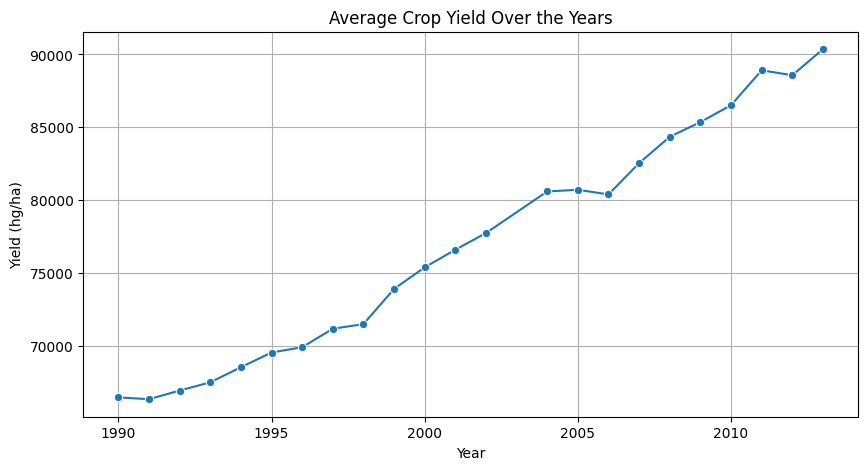

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.lineplot(data=df.groupby('Year')['yield_hg/ha'].mean().reset_index(), x='Year', y='yield_hg/ha', marker='o')
plt.title("Average Crop Yield Over the Years")
plt.xlabel("Year")
plt.ylabel("Yield (hg/ha)")
plt.grid(True)
plt.show()

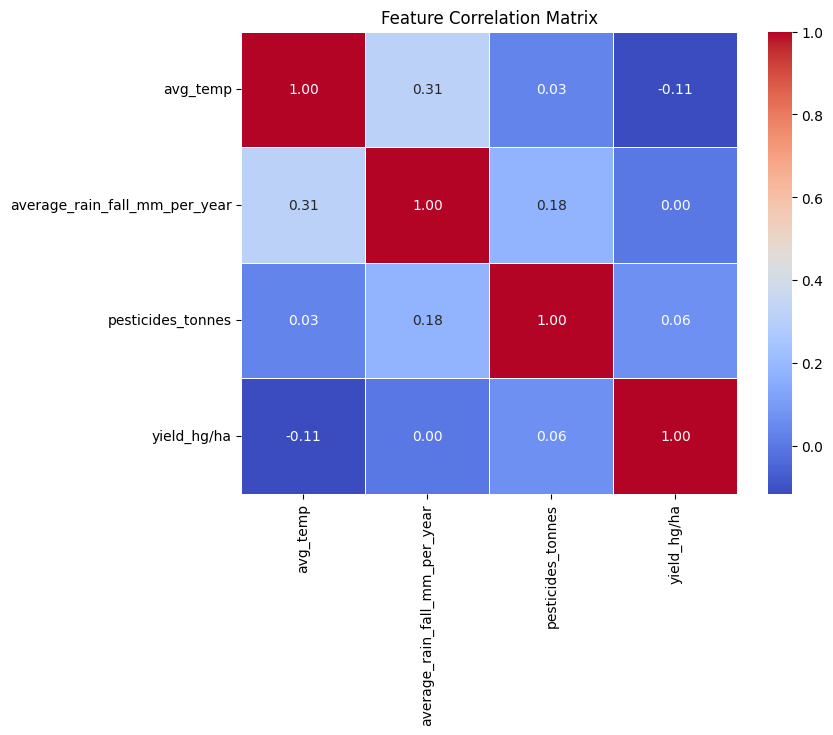

In [ ]:
# Selecting relevant numerical columns for correlation
correlation_features = ['avg_temp', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'yield_hg/ha']
correlation_matrix = df[correlation_features].corr()
# � 1. Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

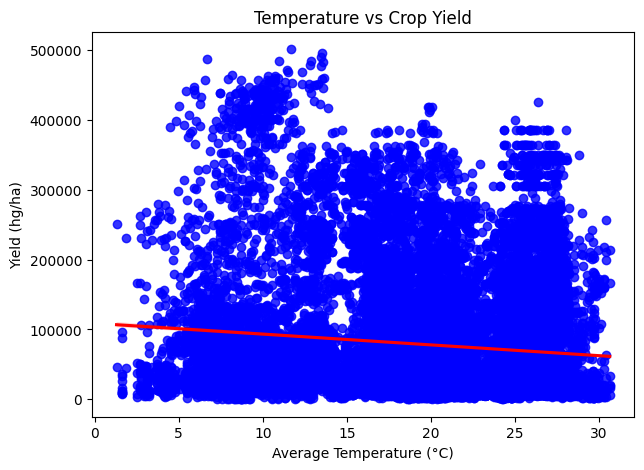

In [ ]:
plt.figure(figsize=(7, 5))
sns.regplot(x='avg_temp', y='yield_hg/ha', data=df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title("Temperature vs Crop Yield")
plt.xlabel("Average Temperature (°C)")
plt.ylabel("Yield (hg/ha)")
plt.show()


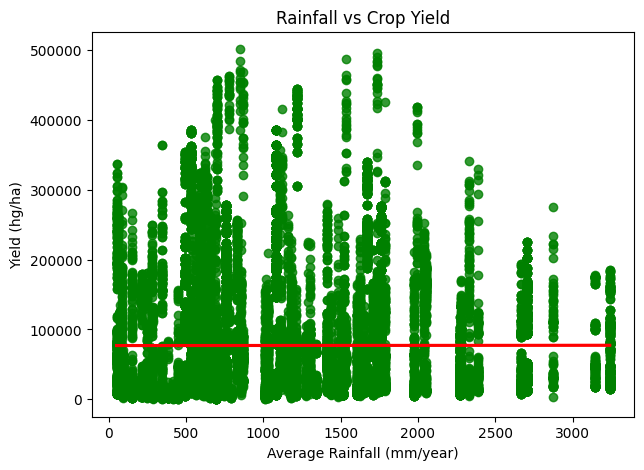

In [ ]:
plt.figure(figsize=(7, 5))
sns.regplot(x='average_rain_fall_mm_per_year', y='yield_hg/ha', data=df, scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.title("Rainfall vs Crop Yield")
plt.xlabel("Average Rainfall (mm/year)")
plt.ylabel("Yield (hg/ha)")
plt.show()

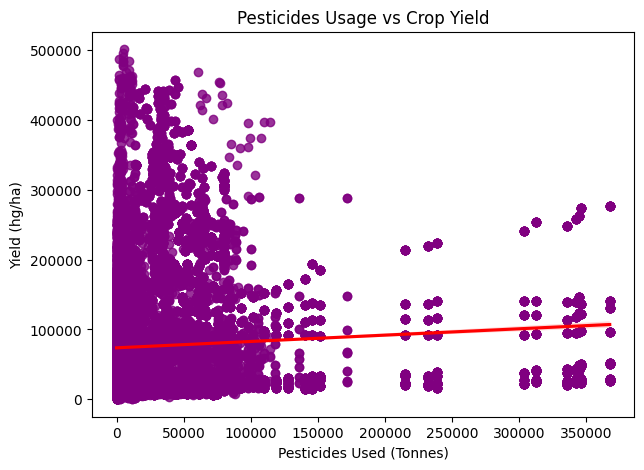

In [ ]:
plt.figure(figsize=(7, 5))
sns.regplot(x='pesticides_tonnes', y='yield_hg/ha', data=df, scatter_kws={"color": "purple"}, line_kws={"color": "red"})
plt.title("Pesticides Usage vs Crop Yield")
plt.xlabel("Pesticides Used (Tonnes)")
plt.ylabel("Yield (hg/ha)")
plt.show()

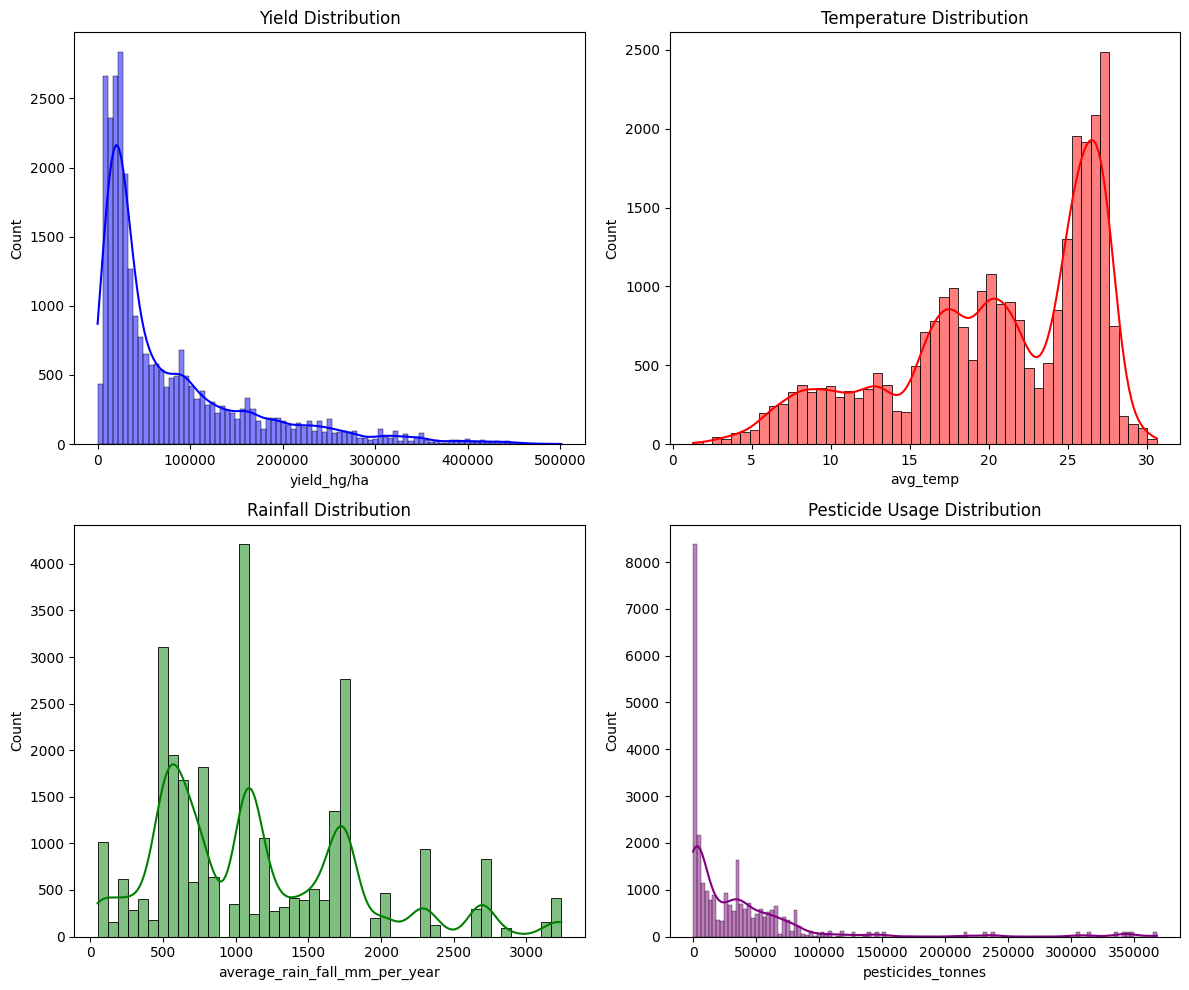

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(df['yield_hg/ha'], kde=True, ax=axes[0, 0], color='blue')
axes[0, 0].set_title("Yield Distribution")
sns.histplot(df['avg_temp'], kde=True, ax=axes[0, 1], color='red')
axes[0, 1].set_title("Temperature Distribution")
sns.histplot(df['average_rain_fall_mm_per_year'], kde=True, ax=axes[1, 0], color='green')
axes[1, 0].set_title("Rainfall Distribution")
sns.histplot(df['pesticides_tonnes'], kde=True, ax=axes[1, 1], color='purple')
axes[1, 1].set_title("Pesticide Usage Distribution")
plt.tight_layout()
plt.show()

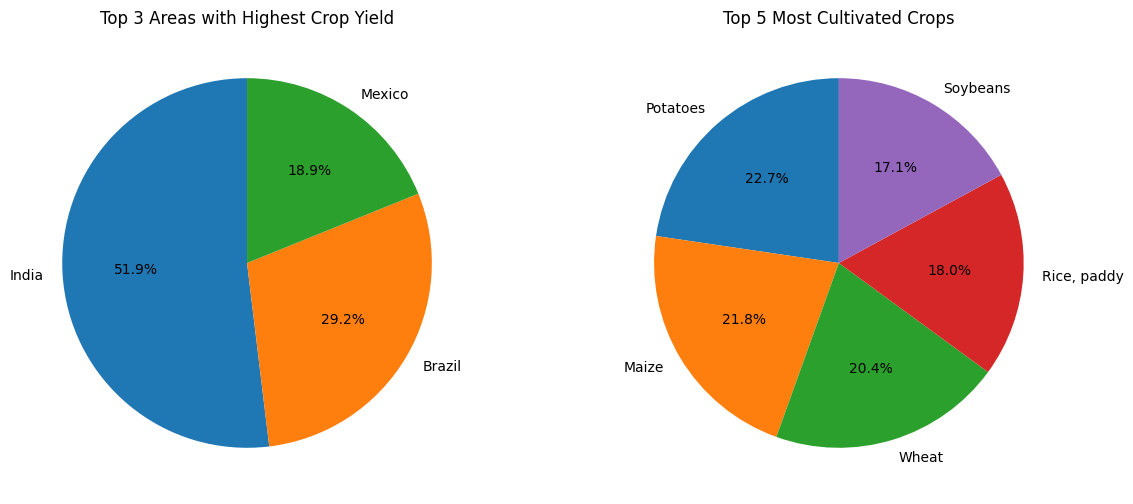

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
df['Area'].value_counts()[:3].plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=axes[0])
axes[0].set_ylabel("")
axes[0].set_title("Top 3 Areas with Highest Crop Yield")
df['Crop'].value_counts()[:5].plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=axes[1])
axes[1].set_ylabel("")
axes[1].set_title("Top 5 Most Cultivated Crops")
plt.show()

In [ ]:
# Copy DataFrame to avoid modifying original data
df_cleaned = df.copy()

In [ ]:
categorical_cols = ['Area', 'Crop']
for col in categorical_cols:
  if col in df_cleaned.columns:
    df_cleaned = pd.get_dummies(df_cleaned, columns=[col])
  else:
    print(f"Warning: Column '{col}' not found in dataset!")

In [ ]:
scaler = StandardScaler()
num_cols = ['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']
# Fill missing values in numerical columns with median
df_cleaned[num_cols] = df_cleaned[num_cols].fillna(df_cleaned[num_cols].median())
# Apply standard scaling
df_cleaned[num_cols] = scaler.fit_transform(df_cleaned[num_cols])
print("Data Preprocessing Completed Successfully!")

Data Preprocessing Completed Successfully!


In [ ]:
X = df_cleaned.drop(['yield_hg/ha'], axis=1)
y = df_cleaned['yield_hg/ha']
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model_mlr = LinearRegression()
model_mlr.fit(X_train, y_train)
y_pred_mlr_train = model_mlr.predict(X_train)
y_pred_mlr = model_mlr.predict(X_test)

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)
y_pred_poly_train = model_poly.predict(X_train_poly)
y_pred_poly = model_poly.predict(X_test_poly)

In [ ]:
X_train_combined = np.column_stack((y_pred_mlr_train, y_pred_poly_train))
X_test_combined = np.column_stack((y_pred_mlr, y_pred_poly))


In [ ]:
param_dist = {
'n_estimators': [100, 200, 300],
'learning_rate': [0.01, 0.05, 0.1],
'max_depth': [3, 4, 5]
}
gb_model = GradientBoostingRegressor(random_state=42)
grid_search = RandomizedSearchCV(gb_model, param_distributions=param_dist,
n_iter=20, cv=3, scoring='r2', n_jobs=-1, verbose=1)
grid_search.fit(X_train_combined, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 4, 5],
                                        'n_estimators': [100, 200, 300]},
                   scoring='r2', verbose=1)

In [ ]:
best_gb = grid_search.best_estimator_
best_gb.fit(X_train_combined, y_train)
y_pred_hybrid = best_gb.predict(X_test_combined)
print("Model Training Completed Successfully!")

Model Training Completed Successfully!


In [ ]:
# Calculate metrics
mse_hybrid = mean_squared_error(y_test, y_pred_hybrid)
rmse_hybrid = np.sqrt(mse_hybrid) # Root Mean Squared Error
r2_hybrid = r2_score(y_test, y_pred_hybrid)
mae_hybrid = mean_absolute_error(y_test, y_pred_hybrid)
# Adjusted R² Calculation
n = len(y_test) # Number of samples
p = X_test.shape[1] # Number of predictors (features)
adjusted_r2_hybrid = 1 - ((1 - r2_hybrid) * (n - 1) / (n - p - 1))

In [ ]:
# Convert metrics to hectogram per hectare (hg/ha)
mse_hybrid_hg = mse_hybrid * 100 # Convert kg²/ha² to hg²/ha²
rmse_hybrid_hg = rmse_hybrid * 10 # Convert kg/ha to hg/ha
mae_hybrid_hg = mae_hybrid * 10 # Convert kg/ha to hg/ha

In [ ]:
# Print results
print(f"Hybrid Model - MSE (hg²/ha²): {mse_hybrid_hg:.2f}")
print(f"Hybrid Model - RMSE (hg/ha): {rmse_hybrid_hg:.2f}")
print(f"Hybrid Model - R² Score: {r2_hybrid:.4f}")
print(f"Hybrid Model - Adjusted R² Score: {adjusted_r2_hybrid:.4f}")
print(f"Hybrid Model - MAE (hg/ha): {mae_hybrid_hg:.2f}")

Hybrid Model - MSE (hg²/ha²): 18766863389.14
Hybrid Model - RMSE (hg/ha): 136992.20
Hybrid Model - R² Score: 0.9741
Hybrid Model - Adjusted R² Score: 0.9736
Hybrid Model - MAE (hg/ha): 75205.09


In [ ]:
# Data with Updated Hybrid Model Values
models = ["DecisionTree", "GradientBoosting", "RandomForest", "GELPM(Proposed)"]
metrics = {
"MSE (Lower is Better)": [27821209531.81, 75291435220.94, 219300208222.34, 18766863389.14],
"RMSE (Lower is Better)": [166796.91, 274392.85, 468295.00, 136992.20],
"MAE (Lower is Better)": [58575.90, 178202.52, 317483.63, 75205.09],
"R² Score (Higher is Better)": [0.9611, 0.8949, 0.6937, 0.9741],
"Adjusted R² Score (Higher is Better)": [0.9603, 0.8927, 0.6874, 0.9736]
}

In [ ]:
# Convert to DataFrame
df = pd.DataFrame(metrics, index=models)
df = df.reset_index().melt(id_vars=["index"], var_name="Metric", value_name="Value")

In [ ]:
# Convert to DataFrame
df_metrics = pd.DataFrame(metrics, index=models)  # Assign to df_metrics
df = df_metrics.reset_index().melt(id_vars=["index"], var_name="Metric", value_name="Value")  # Assign melted DataFrame to df

# Ensure each plot is correctly filtered
for metric in df_metrics.columns:  # Iterate through df_metrics columns
    df_filtered = df[df["Metric"] == metric]
    fig = px.bar(
        df_filtered,  # Use the correctly filtered data
        x="index",
        y="Value",
        text="Value",
        title=f"{metric} Comparison",
        labels={"index": "Model", "Value": metric},
        template="plotly_white",
        color="index"
    )
    # Reduce figure size and adjust font size
    fig.update_layout(
        width=500,  # Adjust width (default ~700)
        height=350,  # Adjust height (default ~500)
        font=dict(size=12)  # Reduce font size for better scaling
    )
    fig.show()

In [ ]:
models = ["DecisionTree", "GradientBoosting", "RandomForest", "GELPM(Proposed)"]
# Updated performance metrics (Hybrid Model Improved Values)
mse = np.array([27821209531.81, 75291435220.94, 219300208222.34, 18766863389.14]) # Updated MSE
rmse = np.array([166796.91, 274392.85, 468295.00, 136992.20]) # Updated RMSE
mae = np.array([58575.90, 178202.52, 317483.63, 75205.09]) # Updated MAE
r2 = np.array([0.9611, 0.8949, 0.6937, 0.9741]) # Updated R²
adj_r2 = np.array([0.9603, 0.8927, 0.6874, 0.9736]) # Updated Adjusted R²


In [ ]:
# Stack error metrics for Min-Max Scaling
error_metrics = np.vstack((mse, rmse, mae)).T # Shape (4,3)
# Apply Min-Max Scaling (0 to 1)
scaler = MinMaxScaler()
normalized_errors = scaler.fit_transform(error_metrics)
# Invert the scale for error metrics (since lower is better)
normalized_errors = 1 - normalized_errors
# Combine errors with R² and Adjusted R² (which are already between 0-1)
normalized_metrics = np.column_stack((normalized_errors, r2, adj_r2))

In [ ]:
# Compute an aggregated performance score
performance_trend = np.mean(normalized_metrics, axis=1)

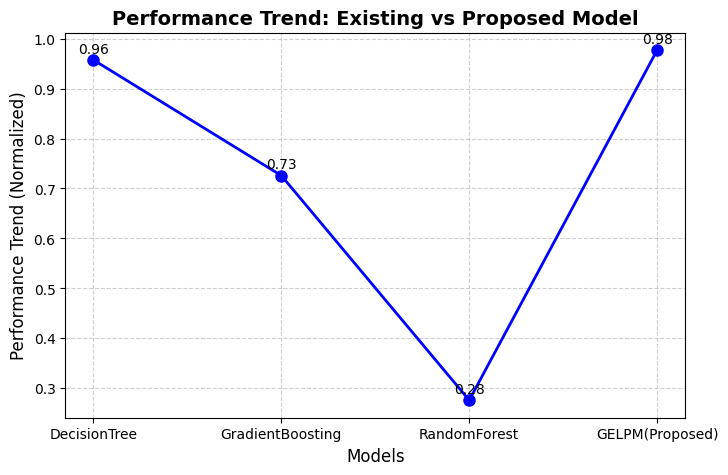

In [ ]:
# Plotting the performance trend
plt.figure(figsize=(8, 5))
plt.plot(models, performance_trend, marker='o', linestyle='-', color='blue', linewidth=2, markersize=8)
# Labels and title
plt.xlabel("Models", fontsize=12)
plt.ylabel("Performance Trend (Normalized)", fontsize=12)
plt.title("Performance Trend: Existing vs Proposed Model", fontsize=14, fontweight='bold')
# Annotate points
for i, txt in enumerate(performance_trend):
  plt.annotate(f"{txt:.2f}", (models[i], performance_trend[i]), textcoords="offset points", xytext=(0,5), ha='center')
  plt.grid(True, linestyle='--', alpha=0.6)
# Show the plot
plt.show()


In [ ]:
# Predict yield for the entire dataset
y_pred_all = best_gb.predict(np.column_stack((model_mlr.predict(X), model_poly.predict(poly.transform(X)))))
# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({'Actual Yield': y, 'Predicted Yield': y_pred_all})
# Save to a CSV file
results_df.to_csv("yield_predictions.csv", index=False)
print("Predictions saved successfully to 'yield_predictions.csv'")
from google.colab import files
files.download("yield_predictions.csv")

Predictions saved successfully to 'yield_predictions.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

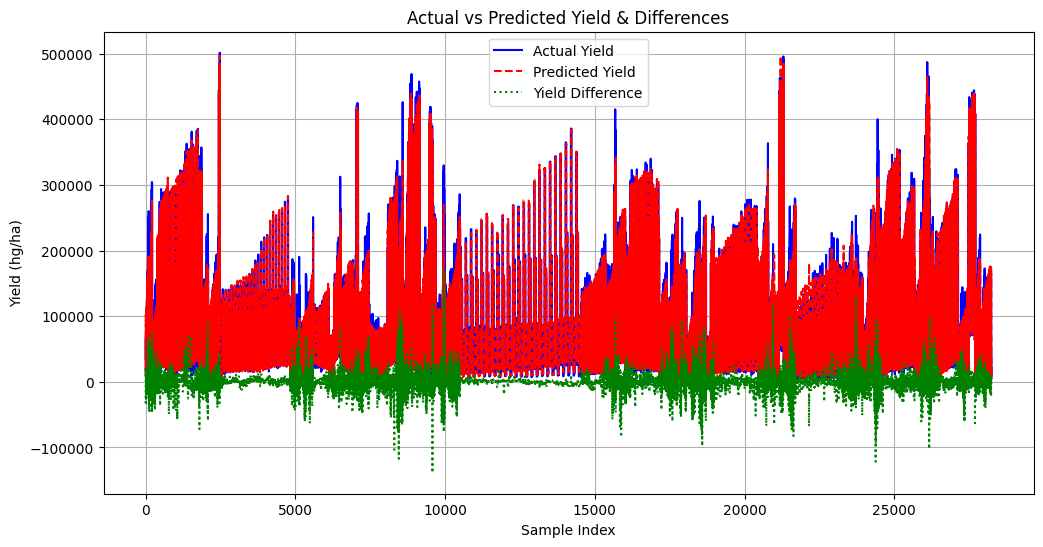

In [ ]:
# Load yield predictions data
df = pd.read_csv("/content/yield_predictions.csv")
# Compute yield difference (Error)
df["Yield Difference"] = df["Actual Yield"] - df["Predicted Yield"]
# Plot Actual vs Predicted Yield
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Actual Yield"], label="Actual Yield", color="blue")
plt.plot(df.index, df["Predicted Yield"], label="Predicted Yield", linestyle="dashed", color="red")
# Add Difference Line
plt.plot(df.index, df["Yield Difference"], label="Yield Difference", linestyle="dotted", color="green")
# Labels & Title
plt.xlabel("Sample Index")
plt.ylabel("Yield (hg/ha)")
plt.title("Actual vs Predicted Yield & Differences")
plt.legend()
plt.grid(True)
# Show Graph
plt.show()
